In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
database_path = "sqlite:///Resources/hawaii.sqlite"

In [30]:
# reflect an existing database into a new model
database_path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(database_path)
 


In [37]:
# View all of the classes that automap found
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
import warnings

database_path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(database_path)

Base.prepare(autoload_with=engine)

# mapped classes are now created with names by default
# matching that of the table name.
all_classes = Base.classes

# Print the names of all classes
for class_name in all_classes.keys():
    print(class_name)



station
measurement


In [39]:
# Save references to each table
Station = all_classes.station  
Measurement = all_classes.measurement


In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Find the most recent date in the data set.
Measurement = Base.classes.measurement

# Query to find the most recent date
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print("The most recent date in the dataset is:", most_recent_date)

The most recent date in the dataset is: 2017-08-23


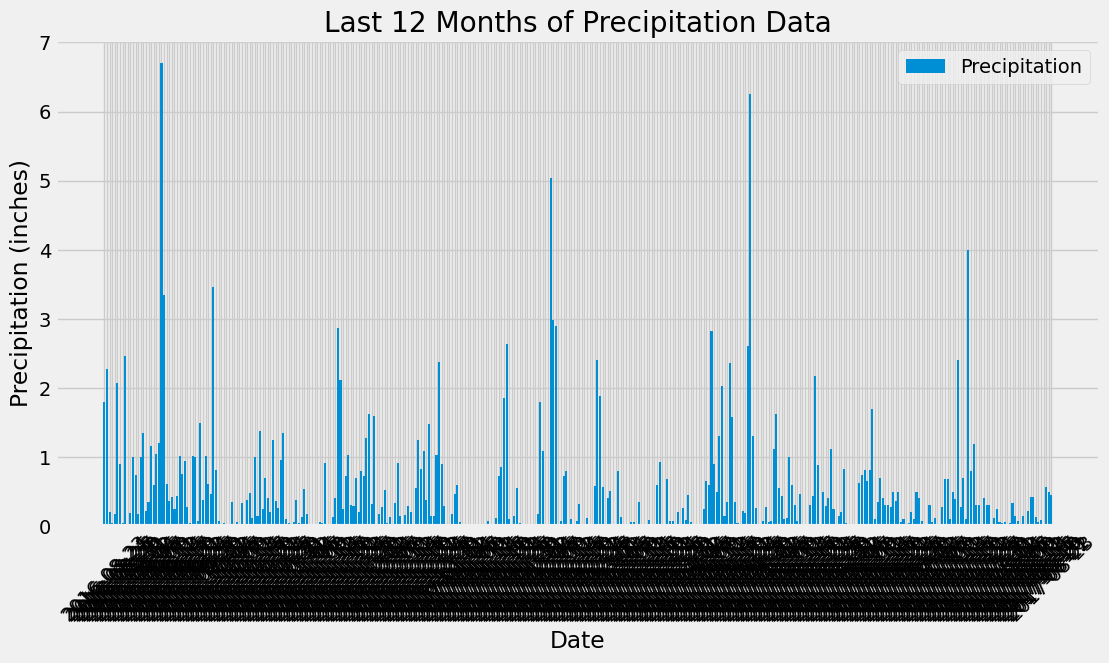

In [49]:
easurement = Base.classes.measurement

# Calculate the date one year from the last date in the dataset
last_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = pd.to_datetime(last_date) - pd.DateOffset(years=1)


one_year_ago_dt = pd.to_datetime(one_year_ago_str)

precipitation_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago_str)\
    .order_by(Measurement.date)\
    .all()


precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Set the 'Date' column as the index
precipitation_df.set_index('Date', inplace=True)

# Use Pandas to calculate the summary statistics
summary_statistics = precipitation_df.describe()

# Display the summary statistics
print(summary_statistics)


       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [52]:
from sqlalchemy import func, distinct

# Design a query to calculate the total number of stations
total_stations = session.query(func.count(distinct(Measurement.station))).scalar()

# Display the total number of stations
print(f'Total number of stations: {total_stations}')



Total number of stations: 9


In [53]:
from sqlalchemy import func

# Design a query to find the most active stations
station_activity = session.query(Measurement.station, func.count(Measurement.station))\
                          .group_by(Measurement.station)\
                          .order_by(func.count(Measurement.station).desc())\
                          .all()

# Display the most active stations and their counts
for station, count in station_activity:
    print(f'Station: {station}, Count: {count}')




Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [55]:
# Design a query to find the most active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                              .group_by(Measurement.station)\
                              .order_by(func.count(Measurement.station).desc())\
                              .all()

# Assuming most_active_station is the ID of the most active station from the previous query
most_active_station_id = most_active_stations[0][0]  # Replace with the actual variable you have

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs))\
                           .filter(Measurement.station == most_active_station_id)\
                           .all()

# Extracting the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

# Display the results
print(f"Most Active Station: {most_active_station_id}")
print(f"Lowest Temperature: {lowest_temp} F")
print(f"Highest Temperature: {highest_temp} F")
print(f"Average Temperature: {avg_temp} F")



Most Active Station: USC00519281
Lowest Temperature: 54.0 F
Highest Temperature: 85.0 F
Average Temperature: 71.66378066378067 F


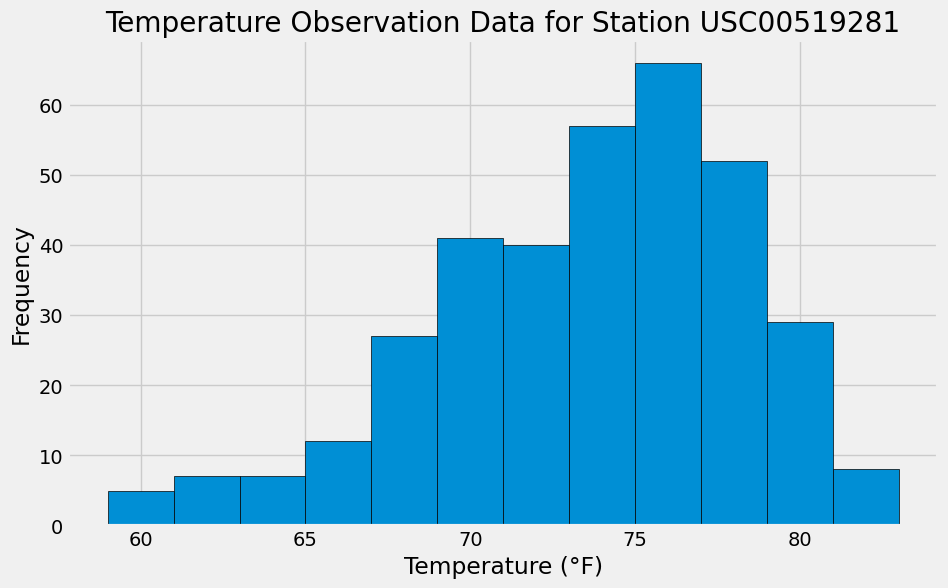

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta


latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')
one_year_ago = latest_date - timedelta(days=365)

temperature_data = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.station == most_active_station_id)\
    .filter(Measurement.date >= one_year_ago)\
    .all()


temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [57]:
# Close Session
session.close()